In [33]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#코스피 지수 불러오기
kospi = pd.read_csv("kospi_data.csv")
kospi

,Date,Close,Open,High,Low,Volume,Change
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116
...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099


In [4]:
kospi['Date'] = pd.to_datetime(kospi["Date"])

In [6]:
#sp 지수 불러오기
sp = pd.read_csv("S&P500.csv")
sp

,Date,Close,Open,High,Low,Change,Log_Rate
0,1979-12-26,107.80,107.8,108.4,107.1,0.09,NaN
1,1979-12-27,108.00,108.0,108.5,107.1,0.19,0.001854
2,1979-12-28,107.80,107.8,108.6,107.2,-0.19,-0.001854
3,1979-12-31,107.90,107.9,108.5,107.3,0.09,0.000927
4,1980-01-01,107.90,107.9,107.9,107.9,0.00,0.000000
...,...,...,...,...,...,...,...
10851,2023-01-04,3852.97,"3,840.36","3,873.16","3,815.77",0.75,0.007511
10852,2023-01-05,3808.10,"3,839.74","3,839.74","3,802.42",-1.16,-0.011714
10853,2023-01-06,3895.08,"3,823.37","3,906.19","3,809.56",2.28,0.022584
10854,2023-01-09,3892.09,"3,910.82","3,950.57","3,890.42",-0.08,-0.000768


In [38]:
sp['Date'] = pd.to_datetime(sp["Date"])

실업률이 상승하면 주가가 하락한다

주말 효과 : 주중일별수익률에서 월요일에는 수익률이 낮고 금요일에는 수익률이 높은 현상

마천루의 저주

Big buildings, big declines

1) 롯데월드 타워 (2016.12.22)

In [9]:
# kospi지수
kospi[(kospi['Date'] >= "2015-01-01") & (kospi["Date"] <= "2017-12-31")]

,Date,Close,Open,High,Low,Volume,Change
9137,2015-01-02,1926.44,1914.24,1929.15,1909.67,258780000.0,0.0057
9138,2015-01-05,1915.75,1921.96,1921.96,1903.37,313440000.0,-0.0055
9139,2015-01-06,1882.45,1895.48,1900.02,1877.38,303690000.0,-0.0174
9140,2015-01-07,1883.83,1878.90,1887.60,1876.27,280510000.0,0.0007
9141,2015-01-08,1904.65,1895.85,1907.23,1891.77,262210000.0,0.0111
...,...,...,...,...,...,...,...
9869,2017-12-21,2429.83,2471.34,2471.73,2429.83,247330000.0,-0.0172
9870,2017-12-22,2440.54,2437.59,2444.57,2426.94,230410000.0,0.0044
9871,2017-12-26,2427.34,2447.67,2457.19,2427.34,224640000.0,-0.0054
9872,2017-12-27,2436.67,2420.86,2436.68,2411.48,194850000.0,0.0038


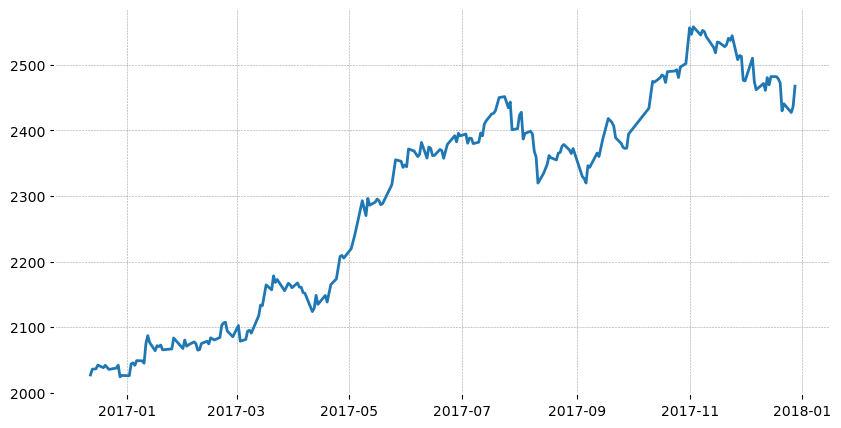

In [53]:
# 롯데월드 타워
plt.figure(figsize = (10,5))
x = kospi[(kospi['Date'] >= "2016-12-10") & (kospi["Date"] <= "2017-12-31")]['Date']
y = kospi[(kospi['Date'] >= "2016-12-10") & (kospi["Date"] <= "2017-12-31")]['Close']
plt.plot(x, y)

plt.show()

In [40]:
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
from datetime import datetime, timedelta

In [42]:
kospi_candle = pd.read_csv("kospi_data.csv", index_col = 0)
kospi_candle.index = pd.to_datetime(kospi_candle.index)

In [40]:
sp_candle = pd.read_csv("S&P500.csv", index_col = 0)
sp_candle.index = pd.to_datetime(sp_candle.index)

In [41]:
sp_candle

,Close,Open,High,Low,Change,Log_Rate
Date,,,,,,
1979-12-26,107.80,107.8,108.4,107.1,0.09,NaN
1979-12-27,108.00,108.0,108.5,107.1,0.19,0.001854
1979-12-28,107.80,107.8,108.6,107.2,-0.19,-0.001854
1979-12-31,107.90,107.9,108.5,107.3,0.09,0.000927
1980-01-01,107.90,107.9,107.9,107.9,0.00,0.000000
...,...,...,...,...,...,...
2023-01-04,3852.97,"3,840.36","3,873.16","3,815.77",0.75,0.007511
2023-01-05,3808.10,"3,839.74","3,839.74","3,802.42",-1.16,-0.011714
2023-01-06,3895.08,"3,823.37","3,906.19","3,809.56",2.28,0.022584


In [48]:
sp_candle['Low'] = [x.replace(",", "") for x in sp_candle['Low']]
sp_candle = sp_candle.astype({'Low':'float64'})

AttributeError: 'float' object has no attribute 'replace'

In [49]:
sp_candle['Open'] = [x.replace(",", "") for x in sp_candle['Open']]
sp_candle = sp_candle.astype({'Open':'float64'})

AttributeError: 'float' object has no attribute 'replace'

In [46]:
sp_candle['High'] = [x.replace(",", "") for x in sp_candle['High']]
sp_candle = sp_candle.astype({'High':'float64'})

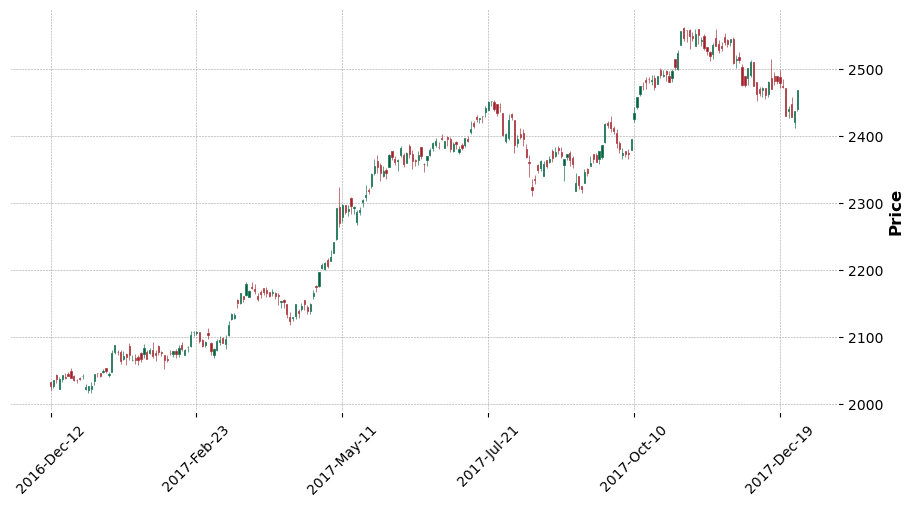

In [54]:
#fig = mpf.figure(figsize=(50, 20))
mpf.plot(kospi_candle['2016-12-10':'2017-12-31'], type='candle', style='charles', figratio = (10,5))
plt.show()

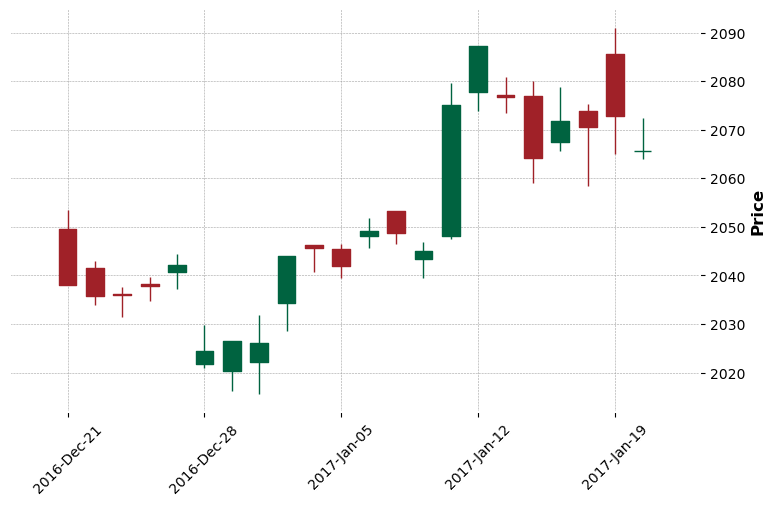

In [55]:
mpf.plot(kospi_candle['2016-12-21':'2017-01-21'], type='candle', style='charles', figratio = (5, 3))
plt.show()

#양봉 : 시가보다 주가가 상승하여 종가가 높게 끝나는 경우 : 초록색
#음봉 : 시가보다 주가가 하락하여 종가가 더 낮게 끝나는 경우 : 빨간색